In [1]:
import tensorflow

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [3]:
import urllib.request

In [5]:
from PIL import Image

In [6]:
url = 'https://qph.fs.quoracdn.net/main-qimg-f22541ff53f37cb0fbf972c152b95120'

In [7]:
image = Image.open(urllib.request.urlopen(url))

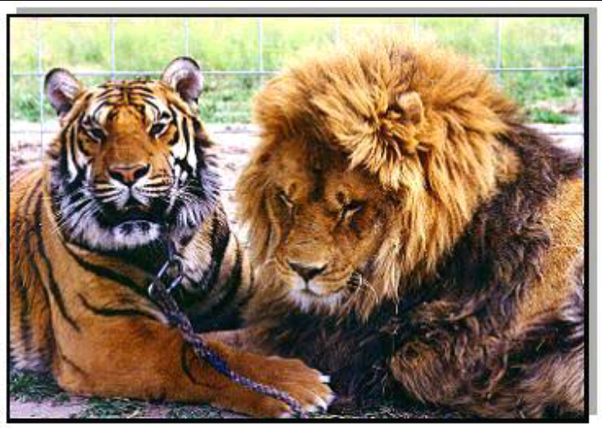

In [8]:
image

In [16]:
model = ResNet50(weights = 'imagenet',include_top = True)

In [10]:
image.size

(602, 428)

In [13]:
import PIL
img = load_img(urllib.request.urlopen(url), target_size = (224,224))

In [14]:
image = img_to_array(img)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [19]:
yhat = model.predict(image)
label = decode_predictions(yhat)

In [31]:
names = []
for i in label[0]:
    names.append(i[1])

In [24]:
import import_ipynb
from data603 import SparkLauncher
from data603 import HDFS

hdfs = HDFS.get_hdfs()

importing Jupyter notebook from /scratch/data603/yk98337/data603/SparkLauncher.ipynb
Creating Spark Configuration
importing Jupyter notebook from /scratch/data603/yk98337/data603/HDFS.ipynb


In [25]:
import os
import pyarrow as pa
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import venv_pack

In [27]:
import import_ipynb
from data603 import SparkLauncher

# get a configuration object
conf = SparkLauncher.get_spark_conf()

# add a file to the configuration that will get copied to all the nodes on the cluster
conf.set('spark.yarn.dist.files', 'keras_data/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

# launch the cluster using the configuration
spark = SparkLauncher.get_spark_session(pack_venv = False, conf = conf)


Creating Spark Configuration
Setting Environment Variables
Creating Spark Session: yk98337_data603_spark_session


In [28]:
cats = spark.read.parquet('/user/yk98337/land_mammals.parquet')

In [35]:
import pyspark.sql.functions as F
cats = cats.withColumn('LabelText',F.lower(F.col('Label')))

In [38]:
n = cats.select('LabelText').distinct().collect()

In [83]:
n

[Row(LabelText='leopard'),
 Row(LabelText='lion'),
 Row(LabelText='cat'),
 Row(LabelText='lynx'),
 Row(LabelText='cheetah'),
 Row(LabelText='tiger')]

In [81]:
len(names)

5

In [95]:
nam = []
for i in range(len(n)):
    alp = ''
    for i in str(n[i]):
        if i.isalnum():
            alp += i
    alp = re.sub(r'^RowLabelText=*','',alp)
    nam.append(alp)
nam

['leopard', 'lion', 'cat', 'lynx', 'cheetah', 'tiger']

In [93]:
n[5]

Row(LabelText='tiger')

In [97]:
cats1 = 0
for i in names:
    if i in nam:
        a = cats.where(cats['LabelText'] == i)
        if str(type(cats1)) == "<class 'pyspark.sql.dataframe.DataFrame'>":
            cats1 = cats1.union(a)
        else:
            cats1 = a

In [96]:
str(type(cats))

"<class 'pyspark.sql.dataframe.DataFrame'>"

In [71]:
type(cats)

pyspark.sql.dataframe.DataFrame

In [73]:
print(nam,names)

['leopard', 'lion', 'cat', 'lynx', 'cheetah'] ['tiger', 'tiger_cat', 'chow', 'lion', 'tabby']


In [98]:
cats1.select('LabelText').distinct().show()

+---------+
|LabelText|
+---------+
|     lion|
|    tiger|
+---------+



In [99]:
cats1.count()

3223

In [101]:
cats1 = cats1.select(['chip_data','Label'])

In [112]:
cats1.columns

['chip_data', 'Label', 'ppi']

In [113]:
def get_ppi(data):
    import math
    import io
    diagonal = 15.4
    img = Image.open(io.BytesIO(data))
    w,h = img.size
    ppi = math.sqrt((w^2)+(h^2))/diagonal
    return ppi

In [114]:
# make a UDF
from pyspark.sql.types import *
from pyspark.sql.functions import udf

schema = FloatType()

udf_evaluate_chip = udf(get_ppi, schema)

In [115]:
cats1 = cats1.withColumn("ppi", udf_evaluate_chip("chip_data"))

In [116]:
cats1.select('ppi').show(5)

+---------+
|      ppi|
+---------+
|1.9502152|
|2.4192126|
|1.8537796|
|2.2249146|
|2.5982141|
+---------+
only showing top 5 rows



----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 37840)
Traceback (most recent call last):
  File "/usr/lib64/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib64/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib64/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib64/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/scratch/data603_virtualenv/yk98337/lib64/python3.6/site-packages/pyspark/accumulators.py", line 267, in handle
    poll(authenticate_and_accum_updates)
  File "/scratch/data603_virtualenv/yk98337/lib64/python3.6/site-packages/pyspark/accumulators.py", line 239, in poll
    r, _, _ = select.select([self.rfile], [], [], 1)
ValueError: filedescriptor out of ran